In [1]:
import pandas as pd
import os

data_dir = "math_qa"

splits = ["train-easy", "train-medium", "train-hard", "interpolate", "extrapolate"]

In [2]:
# if multiple digits are written with `,` it means that there are multiple solutions
# return a list of solutions
def parse_multiple_solutions(line):
    if "," in line:
        return line.split(",")
    return [line]


# get the task field from the file name
def get_task_field(file_name):
    return file_name.split("__")[0]

In [3]:
data_dict = {}
for split in splits:
    split_dir = os.path.join(data_dir, split)
    for file in os.listdir(split_dir):
        with open(os.path.join(split_dir, file), "r") as f:
            lines = f.readlines()
            # combine pair of lines (question and answer) into a single line
            file_name = file.split(".")[0]
            task_field = get_task_field(file_name)
            if task_field not in data_dict:
                data_dict[task_field] = []
            for i in range(0, len(lines), 2):
                question = lines[i].strip()
                answer = lines[i+1].strip()

                data_dict[task_field].append({
                    "question": question,
                    "answer": answer
                })

In [4]:
print(data_dict.keys())
for key in data_dict.keys():
    print(key, '-', len(data_dict[key]))

dict_keys(['numbers', 'algebra', 'probability', 'arithmetic', 'comparison', 'polynomials', 'measurement', 'calculus'])
numbers - 343
algebra - 162
probability - 58
arithmetic - 231
comparison - 182
polynomials - 152
measurement - 48
calculus - 38


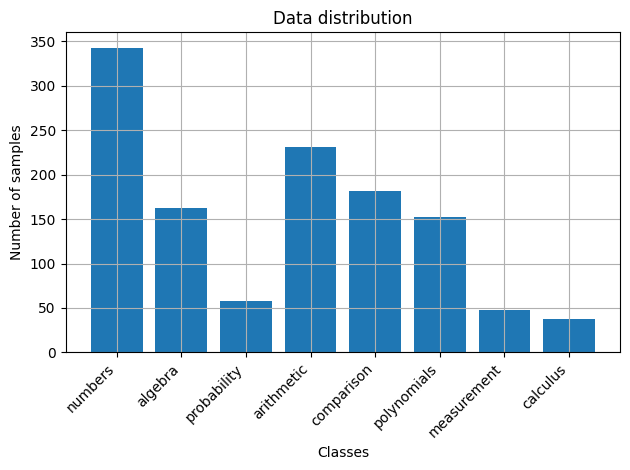

In [5]:
# visualize data distribution

import matplotlib.pyplot as plt

classes = data_dict.keys()

# plot the distribution of the classes
plt.bar(classes, [len(data_dict[c]) for c in classes])
plt.xlabel("Classes")
plt.ylabel("Number of samples")
plt.title("Data distribution")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid()
plt.show()

In [6]:
# Convert dictionary to HuggingFace dataset
from datasets import Dataset, DatasetDict
import pandas as pd

# Flatten the data_dict into a single list with category labels
all_data = []
for category, examples in data_dict.items():
    for example in examples:
        all_data.append({
            'question': example['question'],
            'answer': example['answer'],
            'category': category
        })

# Create HuggingFace dataset
dataset = Dataset.from_list(all_data)

print(f"Dataset created with {len(dataset)} examples")
print(f"Dataset features: {dataset.features}")
print(f"First example: {dataset[0]}")

category_datasets = {}
for category, examples in data_dict.items():
    category_datasets[category] = Dataset.from_list(examples)

dataset_dict = DatasetDict(category_datasets)

print(f"\nDatasetDict created with {len(dataset_dict)} categories")
print(f"Categories: {list(dataset_dict.keys())}")
print(f"Example from 'numbers' category: {dataset_dict['numbers'][0]}")

dataset.save_to_disk("math_qa_dataset")
print("\nDataset saved to 'math_qa_dataset' directory")

dataset.to_parquet("math_qa_dataset.parquet")
print("Dataset also saved as 'math_qa_dataset.parquet' file")


Dataset created with 1214 examples
Dataset features: {'question': Value(dtype='string', id=None), 'answer': Value(dtype='string', id=None), 'category': Value(dtype='string', id=None)}
First example: {'question': 'What is the greatest common factor of 13975 and 130?', 'answer': '65', 'category': 'numbers'}

DatasetDict created with 8 categories
Categories: ['numbers', 'algebra', 'probability', 'arithmetic', 'comparison', 'polynomials', 'measurement', 'calculus']
Example from 'numbers' category: {'question': 'What is the greatest common factor of 13975 and 130?', 'answer': '65'}


Saving the dataset (0/1 shards):   0%|          | 0/1214 [00:00<?, ? examples/s]


Dataset saved to 'math_qa_dataset' directory


Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Dataset also saved as 'math_qa_dataset.parquet' file


In [7]:
dataset

Dataset({
    features: ['question', 'answer', 'category'],
    num_rows: 1214
})

In [78]:
import numpy as np

r = np.random.randint(0, len(dataset))
dataset[r]

{'question': 'Suppose 3*j - 432 = -j. Suppose f = 4*f - j. Let a be (-8)/15*30/f. Sort -3, a, 1/4 in descending order.',
 'answer': '1/4, a, -3',
 'category': 'comparison'}